In [1]:
#Initally loading the file into memory and printing first 5 rows
import csv
fn ='Heating_Gas_Consumption.csv'
f = open(fn,'r')
reader = csv.reader(f)
n=0
for row in reader:
    print(row)
    n+=1
    if n > 5:
        break

['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR', 'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #', 'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date', 'Service End Date', '# days', 'Meter Number', 'Estimated', 'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (Therms)', 'ES Commodity', 'Underlying Utility']
['OCEAN BAY APARTMENTS (OCEANSIDE)', 'QUEENS', 'OCEAN BAY APARTMENTS (OCEANSIDE)', 'BLD 1', '', 'BACKUP GENERATOR', '51', '573', 'Q005100', 'FEDERAL', 'NY005010980P', 'National Grid LI', '12206094', '2023-01', '12/30/2022', '01/31/2023', '32', '4973285', 'N', '58.42', '250 Gas Non Resid General Use', 'Yes', '9', 'UTILITY GAS', 'NatGrid LI']
['MELROSE', 'BRONX', 'MELROSE', 'BLD 06', 'NONE', 'BLD 1-8', '28', '523', 'B002800', 'FEDERAL', 'NY005010280P', 'CONSOLIDATED EDISON COMPANY OF NY', '12204326', '2023-01', '12/23/2022', '01/25/2023', '33', '3890439', 'N', '121355.55', 'TRMDHDF', 'Yes', '106950', 'UTILITY GA

In [2]:
#Total number of rows
import csv
fn ='Heating_Gas_Consumption.csv'
f = open(fn,'r')
reader = csv.reader(f)
n=0
for row in reader:
    if n % 10000 == 0:
        print("Row:",n)
    n+=1
print("Total number of rows:",n)

Row: 0
Row: 10000
Row: 20000
Row: 30000
Row: 40000
Row: 50000
Row: 60000
Row: 70000
Row: 80000
Row: 90000
Row: 100000
Row: 110000
Row: 120000
Row: 130000
Row: 140000
Row: 150000
Row: 160000
Row: 170000
Row: 180000
Row: 190000
Row: 200000
Row: 210000
Row: 220000
Row: 230000
Total number of rows: 230214


In [3]:
#Field names of the Dataset
import csv
fn ='Heating_Gas_Consumption.csv'
f = open(fn,'r')
reader = csv.reader(f)
for row in reader:
    print(row)
    break

['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR', 'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #', 'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date', 'Service End Date', '# days', 'Meter Number', 'Estimated', 'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (Therms)', 'ES Commodity', 'Underlying Utility']


In [4]:
#New subset csv file with cleaned data
import csv
import datetime
fn ='Heating_Gas_Consumption.csv'
f = open(fn,'r')
reader = csv.reader(f)
#n = 0
#clear destination file
with open('Subset_Heating_Gas_Consumption.csv','w') as f1:
    f1.write('')

with open('Subset_Heating_Gas_Consumption.csv','a') as f1:
    writer = csv.writer(f1, delimiter=',', lineterminator='\n')
    header = next(reader)
    writer.writerow(header)
    for i,row in enumerate(reader):
        dts=row[14]
        dte=row[15]

        #print(dt)
        try:
            dtstart=datetime.datetime.strptime(dts,'%m/%d/%Y')
            dtend=datetime.datetime.strptime(dte,'%m/%d/%Y')
        except Exception as e:
            pass
           
        #print(dtstart.year,dtend.year)
        if i > 0 and row[0] != '#N/A' and row[1] != 'FHA' and row[1] != 'NON DEVELOPMENT FACILITY' and row[1]!= 'STATEN ISLAND'and dtstart.year >= 2013 and dtend.year >= 2013:
            writer.writerow(row)
        i += 1
       # if i > 10:
        #    break'''


In [6]:
####IMPORTANT CODE#####

import pandas as pd

# Import dataset1
df1 = pd.read_csv('Subset_Heating_Gas_Consumption.csv')

# Import dataset2
df2 = pd.read_csv('Bronx.csv')

# Drop unnecessary columns and rename any columns that need to be changed
#df1.drop(columns=['Meter AMR', 'Meter Scope', 'TDS #','EDP', 'RC Code'], inplace=True)

# Drop unnecessary columns and rename any columns that need to be changed
#df2.drop(columns=['ELEVATION', 'PRCP_ATTRIBUTES', 'SNOW_ATTRIBUTES','SNWD', 'SNWD_ATTRIBUTES', 'TOBS' , 'TOBS_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT06',  'WT06_ATTRIBUTES'], inplace=True)

# concatenate the two dataframes by columns
new_df = pd.concat([df1, df2], axis=1)
# Print the merged dataset
new_df


,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,STATION,NAME,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,MELROSE,BRONX,MELROSE,BLD 06,NONE,BLD 1-8,28.0,523,B002800,FEDERAL,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1,WEBSTER,BRONX,WEBSTER,BLD 04,NONE,BLD 1-5,141.0,231,B014100,FEDERAL,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
2,SACK WERN,BRONX,SACK WERN,BLD 01,NONE,NaN,280.0,506,B028000,FEDERAL,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
3,O'DWYER GARDENS,BROOKLYN,ODWYER GARDENS,BLD 06,AMR,BLD 1-6,172.0,582,K017200,FEDERAL,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
4,REHAB PROGRAM (DOUGLASS REHABS),MANHATTAN,REHAB PROGRAM (DOUGLASS REHABS),BLD 01,NONE,NaN,515.0,299,M051500,FEDERAL,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152393,AMSTERDAM,MANHATTAN,AMSTERDAM,BLD 02,NONE,BLD 1-13,22.0,530,M002200,FEDERAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152394,AMSTERDAM,MANHATTAN,AMSTERDAM,BLD 02,Not Applicable,NaN,22.0,530,M002200,FEDERAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152395,AMSTERDAM AVENUE,MANHATTAN,AMSTERDAM AVENUE,BLD 01,NONE,NaN,150.0,258,M015000,FEDERAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152396,AMSTERDAM AVENUE,MANHATTAN,AMSTERDAM AVENUE,BLD 01,Not Applicable,NaN,150.0,258,M015000,FEDERAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
0,MELROSE,BRONX,MELROSE,BLD 06,NONE,BLD 1-8,28.0,523,B002800,FEDERAL,...,01/25/2023,33.0,3890439,N,121355.55,TRMDHDF,Yes,106950.0,UTILITY GAS,ConEd
1,WEBSTER,BRONX,WEBSTER,BLD 04,NONE,BLD 1-5,141.0,231,B014100,FEDERAL,...,01/25/2023,33.0,3382738,N,136273.15,TRMDHDF,Yes,120186.0,UTILITY GAS,ConEd
2,SACK WERN,BRONX,SACK WERN,BLD 01,NONE,NaN,280.0,506,B028000,FEDERAL,...,01/25/2023,33.0,3512698,N,9567.58,TR II NR,Yes,10168.0,UTILITY GAS,ConEd
3,O'DWYER GARDENS,BROOKLYN,ODWYER GARDENS,BLD 06,AMR,BLD 1-6,172.0,582,K017200,FEDERAL,...,01/25/2023,29.0,5874469,Y,58455.15,T3 TRAN MULT FAM,Yes,109932.0,UTILITY GAS,NatGrid NYC
4,REHAB PROGRAM (DOUGLASS REHABS),MANHATTAN,REHAB PROGRAM (DOUGLASS REHABS),BLD 01,NONE,NaN,515.0,299,M051500,FEDERAL,...,01/25/2023,33.0,3521319,Y,453.16,TR I NR,Yes,536.0,UTILITY GAS,ConEd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152393,AMSTERDAM,MANHATTAN,AMSTERDAM,BLD 02,NONE,BLD 1-13,22.0,530,M002200,FEDERAL,...,01/24/2014,24.0,3513334,Y,76257.83,Trans Res MultiDwell Heat Dual,Yes,143700.0,UTILITY GAS,ConEd
152394,AMSTERDAM,MANHATTAN,AMSTERDAM,BLD 02,Not Applicable,NaN,22.0,530,M002200,FEDERAL,...,01/24/2014,23.0,4.95E+14,N,66978.57,NaN,Yes,143700.0,BROKERED GAS,ConEd
152395,AMSTERDAM AVENUE,MANHATTAN,AMSTERDAM AVENUE,BLD 01,NONE,NaN,150.0,258,M015000,FEDERAL,...,01/24/2014,24.0,2545168,N,9255.68,Trans Res MultiDwell Heat Dual,Yes,16834.0,UTILITY GAS,ConEd
152396,AMSTERDAM AVENUE,MANHATTAN,AMSTERDAM AVENUE,BLD 01,Not Applicable,NaN,150.0,258,M015000,FEDERAL,...,01/24/2014,23.0,4.95E+14,N,7846.33,NaN,Yes,16834.0,BROKERED GAS,ConEd


In [8]:
# Changing Service End Date to datetime format and renmaing it
#df1['Service End Date']=pd.to_datetime(df1['Service End Date'])
#df1['Revenue Month']=pd.to_datetime(df1['Revenue Month'])
df1['Service Start Date']=pd.to_datetime(df1['Service Start Date'])

df1=df1.rename(columns={'Service End Date': 'DATE'})

In [9]:
df1

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,DATE,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
0,MELROSE,BRONX,MELROSE,BLD 06,NONE,BLD 1-8,28.0,523,B002800,FEDERAL,...,01/25/2023,33.0,3890439,N,121355.55,TRMDHDF,Yes,106950.0,UTILITY GAS,ConEd
1,WEBSTER,BRONX,WEBSTER,BLD 04,NONE,BLD 1-5,141.0,231,B014100,FEDERAL,...,01/25/2023,33.0,3382738,N,136273.15,TRMDHDF,Yes,120186.0,UTILITY GAS,ConEd
2,SACK WERN,BRONX,SACK WERN,BLD 01,NONE,NaN,280.0,506,B028000,FEDERAL,...,01/25/2023,33.0,3512698,N,9567.58,TR II NR,Yes,10168.0,UTILITY GAS,ConEd
3,O'DWYER GARDENS,BROOKLYN,ODWYER GARDENS,BLD 06,AMR,BLD 1-6,172.0,582,K017200,FEDERAL,...,01/25/2023,29.0,5874469,Y,58455.15,T3 TRAN MULT FAM,Yes,109932.0,UTILITY GAS,NatGrid NYC
4,REHAB PROGRAM (DOUGLASS REHABS),MANHATTAN,REHAB PROGRAM (DOUGLASS REHABS),BLD 01,NONE,NaN,515.0,299,M051500,FEDERAL,...,01/25/2023,33.0,3521319,Y,453.16,TR I NR,Yes,536.0,UTILITY GAS,ConEd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152393,AMSTERDAM,MANHATTAN,AMSTERDAM,BLD 02,NONE,BLD 1-13,22.0,530,M002200,FEDERAL,...,01/24/2014,24.0,3513334,Y,76257.83,Trans Res MultiDwell Heat Dual,Yes,143700.0,UTILITY GAS,ConEd
152394,AMSTERDAM,MANHATTAN,AMSTERDAM,BLD 02,Not Applicable,NaN,22.0,530,M002200,FEDERAL,...,01/24/2014,23.0,4.95E+14,N,66978.57,NaN,Yes,143700.0,BROKERED GAS,ConEd
152395,AMSTERDAM AVENUE,MANHATTAN,AMSTERDAM AVENUE,BLD 01,NONE,NaN,150.0,258,M015000,FEDERAL,...,01/24/2014,24.0,2545168,N,9255.68,Trans Res MultiDwell Heat Dual,Yes,16834.0,UTILITY GAS,ConEd
152396,AMSTERDAM AVENUE,MANHATTAN,AMSTERDAM AVENUE,BLD 01,Not Applicable,NaN,150.0,258,M015000,FEDERAL,...,01/24/2014,23.0,4.95E+14,N,7846.33,NaN,Yes,16834.0,BROKERED GAS,ConEd


In [10]:
df2

,Development Name,Borough,Account Name,Location,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,...,STATION,NAME,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 01,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8074088,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 04,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8085929,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
2,CLAREMONT REHAB (GROUP 4),BRONX,CLAREMONT REHAB (GROUP 4),BLD 08,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8085941,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
3,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 01,FEDERAL,NY005013080P,EAST COAST POWER & GAS,8201479,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
4,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 04,FEDERAL,NY005013080P,EAST COAST POWER & GAS,8201482,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,HIGHBRIDGE GARDENS,BRONX,HIGHBRIDGE GARDENS,BLD 06,FEDERAL,NY005000780P,EAST COAST POWER & GAS,8048530,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1257,HOE AVENUE-EAST 173RD STREET,BRONX,HOE AVENUE-EAST 173RD STREET,BLD 01,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7869702,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1258,HOE AVENUE-EAST 173RD STREET,BRONX,HOE AVENUE-EAST 173RD STREET,BLD 01,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7869703,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1259,HUNTS POINT AVENUE REHAB,BRONX,HUNTS POINT AVENUE REHAB,BLD 02,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7912324,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
#df2['DATE']=pd.to_datetime(df2['DATE'])
#df1['Revenue Month']=pd.to_datetime(df1['Revenue Month'])
df1['Service Start Date']=pd.to_datetime(df1['Service Start Date'])
df2

,Development Name,Borough,Account Name,Location,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,...,STATION,NAME,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 01,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8074088,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 04,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8085929,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
2,CLAREMONT REHAB (GROUP 4),BRONX,CLAREMONT REHAB (GROUP 4),BLD 08,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8085941,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
3,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 01,FEDERAL,NY005013080P,EAST COAST POWER & GAS,8201479,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
4,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 04,FEDERAL,NY005013080P,EAST COAST POWER & GAS,8201482,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,HIGHBRIDGE GARDENS,BRONX,HIGHBRIDGE GARDENS,BLD 06,FEDERAL,NY005000780P,EAST COAST POWER & GAS,8048530,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1257,HOE AVENUE-EAST 173RD STREET,BRONX,HOE AVENUE-EAST 173RD STREET,BLD 01,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7869702,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1258,HOE AVENUE-EAST 173RD STREET,BRONX,HOE AVENUE-EAST 173RD STREET,BLD 01,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7869703,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1259,HUNTS POINT AVENUE REHAB,BRONX,HUNTS POINT AVENUE REHAB,BLD 02,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7912324,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:

'''

#Combining the two files as CSV
import pandas as pd

# read the first dataset
df1 = pd.read_csv('Subset_Heating_Gas_Consumption.csv')

# read the second dataset
df2 = pd.read_csv('Bronx.csv')

# merge the two datasets based on Borough and latitude/longitude
merged_df = pd.merge(df1, df2, left_on='Development Name', right_on='WT06_ATTRIBUTES')

# save the merged dataset as a new CSV file
merged_df.to_csv('Bronx_merged_dataset.csv', index=False)

'''


In [47]:
df_Bronx=df1[df1['Borough']=='BRONX']
df_Bronx

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,DATE,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
0,MELROSE,BRONX,MELROSE,BLD 06,NONE,BLD 1-8,28.0,523,B002800,FEDERAL,...,01/25/2023,33.0,3890439,N,121355.55,TRMDHDF,Yes,106950.00,UTILITY GAS,ConEd
1,WEBSTER,BRONX,WEBSTER,BLD 04,NONE,BLD 1-5,141.0,231,B014100,FEDERAL,...,01/25/2023,33.0,3382738,N,136273.15,TRMDHDF,Yes,120186.00,UTILITY GAS,ConEd
2,SACK WERN,BRONX,SACK WERN,BLD 01,NONE,NaN,280.0,506,B028000,FEDERAL,...,01/25/2023,33.0,3512698,N,9567.58,TR II NR,Yes,10168.00,UTILITY GAS,ConEd
7,ADAMS,BRONX,ADAMS,BLD 04,NONE,BLD 1-7,118.0,248,B011800,FEDERAL,...,01/25/2023,33.0,3299599,N,184978.49,TRMDHDF,Yes,163401.00,UTILITY GAS,ConEd
8,SACK WERN,BRONX,SACK WERN,BLD 06,AMR,NaN,280.0,506,B028000,FEDERAL,...,01/25/2023,33.0,3492113,N,650.10,TR I NR,Yes,890.45,UTILITY GAS,ConEd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152379,CASTLE HILL,BRONX,CASTLE HILL,BLD 04,Not Applicable,NaN,80.0,431,B008000,MIXED FINANCE/LLC1,...,01/24/2014,23.0,3.95E+14,N,85953.97,NaN,Yes,184411.00,BROKERED GAS,ConEd
152380,CASTLE HILL,BRONX,CASTLE HILL,BLD 04,NONE,BLD 1-14,80.0,431,B008000,MIXED FINANCE/LLC1,...,01/24/2014,24.0,3377623,Y,97758.69,Trans Res MultiDwell Heat Dual,Yes,184411.00,UTILITY GAS,ConEd
152384,BETANCES V,BRONX,BETANCES V,BLD 08,Not Applicable,NaN,231.0,350,B023100,FEDERAL,...,01/24/2014,23.0,3.95E+14,NaN,0.00,NaN,Yes,0.00,BROKERED GAS,ConEd
152385,ADAMS,BRONX,ADAMS,BLD 04,NONE,BLD 1-7,118.0,248,B011800,FEDERAL,...,01/24/2014,24.0,3299599,Y,72006.89,Trans Res MultiDwell Heat Dual,Yes,135651.00,UTILITY GAS,ConEd


In [ ]:
df_Brooklyn=df1[df1['Borough']=='BROOKLYN']
df_Brooklyn

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,DATE,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
3,O'DWYER GARDENS,BROOKLYN,ODWYER GARDENS,BLD 06,AMR,BLD 1-6,172.0,582,K017200,FEDERAL,...,2023-01-25,29.0,5874469,Y,58455.15,T3 TRAN MULT FAM,Yes,109932.00,UTILITY GAS,NatGrid NYC
5,EAST NEW YORK CITY LINE,BROOKLYN,EAST NEW YORK CITY LINE,BLD 24,AMR,BLD 24-27,263.0,378,K026300,FEDERAL,...,2023-01-26,30.0,5593731,N,492.23,T3 TRAN MULT FAM,Exception,712.00,UTILITY GAS,NatGrid NYC
12,BUSHWICK II (GROUPS B & D),BROOKLYN,BUSHWICK II (GROUPS B & D),BLD 29,AMR,NaN,303.0,566,K030300,FEDERAL,...,2023-01-26,30.0,6444112,N,775.81,T3 TRAN MULT FAM,Yes,1191.00,UTILITY GAS,NatGrid NYC
16,EAST NEW YORK CITY LINE,BROOKLYN,EAST NEW YORK CITY LINE,BLD 10,AMR,BLD 9-10,263.0,378,K026300,FEDERAL,...,2023-01-26,30.0,5594418,N,541.06,T3 TRAN MULT FAM,Exception,789.00,UTILITY GAS,NatGrid NYC
18,303 VERNON AVENUE,BROOKLYN,VERNON AVENUE,BLD 01,AMR,NaN,156.0,267,K015600,FEDERAL,...,2023-01-26,30.0,6738875,N,15188.90,T3 TRAN MULT FAM,Exception,28455.00,UTILITY GAS,NatGrid NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152387,ALBANY/ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 04,AMR,BLD 1-6,31.0,524,K003100,FEDERAL,...,2014-01-27,32.0,08372362-66.8%,N,35247.43,T3 TRAN MULT FAM,Yes,130760.33,UTILITY GAS,NatGrid NYC
152388,ALBANY/ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 04,AMR,BLD 7-9,85.0,524,K008500,FEDERAL,...,2014-01-27,32.0,08372362-33.2%,N,17518.18,T3 TRAN MULT FAM,Yes,64988.67,UTILITY GAS,NatGrid NYC
152389,ALBANY/ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 04,Not Applicable,NaN,31.0,524,K003100,FEDERAL,...,2014-01-27,31.0,0298920000-66.8%,N,77736.47,NaN,Yes,132792.05,BROKERED GAS,NatGrid NYC
152390,ALBANY/ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 04,Not Applicable,NaN,85.0,524,K008500,FEDERAL,...,2014-01-27,31.0,0298920000-33.2%,N,38635.49,NaN,Yes,65998.45,BROKERED GAS,NatGrid NYC


In [12]:
df_Manhattan=df1[df1['Borough']=='MANHATTAN']
df_Manhattan

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,DATE,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
4,REHAB PROGRAM (DOUGLASS REHABS),MANHATTAN,REHAB PROGRAM (DOUGLASS REHABS),BLD 01,NONE,NaN,515.0,299,M051500,FEDERAL,...,01/25/2023,33.0,3521319,Y,453.16,TR I NR,Yes,536.0,UTILITY GAS,ConEd
6,MELTZER TOWER,MANHATTAN,MELTZER TOWER,BLD 01,NONE,NaN,183.0,286,M018300,FEDERAL,...,06/23/2022,30.0,2543768,Y,6143.88,TRMDH,Yes,5980.0,UTILITY GAS,ConEd
9,SAMUEL (CITY),MANHATTAN,SAMUEL (CITY),BLD 35,NONE,NaN,377.0,650,M037700,MIXED FINANCE/LLC1,...,11/22/2022,29.0,3570932,Y,4825.63,TRMDH,Yes,3938.0,UTILITY GAS,ConEd
14,MELTZER TOWER,MANHATTAN,MELTZER TOWER,BLD 01,NONE,NaN,183.0,286,M018300,FEDERAL,...,07/25/2022,32.0,2543768,Y,5799.52,TRMDH,Yes,5561.0,UTILITY GAS,ConEd
15,SAMUEL (CITY),MANHATTAN,SAMUEL (CITY),BLD 35,NONE,NaN,377.0,650,M037700,MIXED FINANCE/LLC1,...,10/24/2022,32.0,3570932,Y,4392.98,TRMDH,Yes,4345.0,UTILITY GAS,ConEd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152392,ALLEN STREET,MANHATTAN,ALLEN STREET,BLD 01,Not Applicable,NaN,265.0,380,M026500,FEDERAL,...,01/24/2014,23.0,4.95E+14,N,3334.48,NaN,Yes,7154.0,BROKERED GAS,ConEd
152393,AMSTERDAM,MANHATTAN,AMSTERDAM,BLD 02,NONE,BLD 1-13,22.0,530,M002200,FEDERAL,...,01/24/2014,24.0,3513334,Y,76257.83,Trans Res MultiDwell Heat Dual,Yes,143700.0,UTILITY GAS,ConEd
152394,AMSTERDAM,MANHATTAN,AMSTERDAM,BLD 02,Not Applicable,NaN,22.0,530,M002200,FEDERAL,...,01/24/2014,23.0,4.95E+14,N,66978.57,NaN,Yes,143700.0,BROKERED GAS,ConEd
152395,AMSTERDAM AVENUE,MANHATTAN,AMSTERDAM AVENUE,BLD 01,NONE,NaN,150.0,258,M015000,FEDERAL,...,01/24/2014,24.0,2545168,N,9255.68,Trans Res MultiDwell Heat Dual,Yes,16834.0,UTILITY GAS,ConEd


In [14]:
df_Queens=df1[df1['Borough']=='QUEENS']
df_Queens

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,DATE,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
28,REHAB PROGRAM (COLLEGE POINT),QUEENS,REHAB PROGRAM (COLLEGE POINT),BLD 01,NONE,BLD 1,143.0,297,Q014300,FEDERAL,...,01/25/2023,33.0,4213790,N,2050.98,TR II NR,Yes,1840.0,UTILITY GAS,ConEd
60,ASTORIA,QUEENS,ASTORIA,BLD 12,NONE,NaN,26.0,517,Q002600,FEDERAL,...,01/25/2023,33.0,3979094,N,61.47,GS2,Yes,10.0,UTILITY GAS,ConEd
71,OCEAN BAY APARTMENTS (OCEANSIDE),QUEENS,OCEAN BAY APARTMENTS (OCEANSIDE),NaN,NaN,BACKUP GENERATOR,51.0,573,Q005100,FEDERAL,...,01/31/2023,32.0,9827086,N,69.45,Rate 250 Gas Non Resid General,Yes,10.0,UTILITY GAS,NatGrid LI
79,QUEENSBRIDGE SOUTH,QUEENS,QUEENSBRIDGE SOUTH,BLD 23,NONE,BLD 23-26,5.0,843,Q000500,FEDERAL,...,01/25/2023,33.0,2988768,N,87896.89,TRMDHDF,Yes,77263.0,UTILITY GAS,ConEd
114,ASTORIA,QUEENS,ASTORIA,BLD 21,NONE,NaN,26.0,517,Q002600,FEDERAL,...,01/25/2023,33.0,3956556,N,64.06,GS2,Yes,10.0,UTILITY GAS,ConEd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152020,INTERNATIONAL TOWER,QUEENS,INTERNATIONAL TOWER,BLD 01,AMR,BLD 1,316.0,296,Q031600,FEDERAL,...,01/27/2014,32.0,5187416,N,3491.99,T3 TRAN MULT FAM,Yes,12516.0,UTILITY GAS,NatGrid NYC
152158,FOREST HILLS COOP (108TH STREET-62ND DRIVE),QUEENS,FOREST HILLS COOP (108TH STREET-62ND DRIVE),BLD 02,Not Applicable,NaN,200.0,309,Q020000,FEDERAL-COOP,...,01/27/2014,31.0,878910020,N,34794.01,NaN,Yes,59436.3,BROKERED GAS,NatGrid NYC
152159,FOREST HILLS COOP (108TH STREET-62ND DRIVE),QUEENS,FOREST HILLS COOP (108TH STREET-62ND DRIVE),BLD 02,AMR,BLD 1-4,200.0,309,Q020000,FEDERAL-COOP,...,01/27/2014,32.0,7461668,N,15863.03,T3 TRAN MULT FAM,Yes,58527.0,UTILITY GAS,NatGrid NYC
152301,CONLON LIHFE TOWER,QUEENS,CONLON LIHFE TOWER,BLD 01,Not Applicable,NaN,232.0,347,Q023200,FEDERAL,...,01/27/2014,31.0,1073072710,N,13592.52,NaN,Yes,23219.2,BROKERED GAS,NatGrid NYC


In [15]:
df_Bronx.dtypes 

NameError: name 'df_Bronx' is not defined

In [16]:
#bronx=pd.merge(df_Bronx,df2,on='DATE',how='inner')
#bronx
bronx = df2
bronx=bronx.rename(columns={'Development Name': 'Development_Name', 'Borough': 'Borough', 'Account Name': 'Account_Name',
 'Location': 'Location', 'Funding Source': 'Funding_Source', 'AMP #': 'AMP_Number', 'Vendor Name': 'Vendor_Name', 'UMIS BILL ID': 'UMIS_BILL_ID',
 'Revenue Month': 'Revenue_Month' , 'Service Start Date': 'Service_Start_Date', 'DATE': 'DATE', '# days':'Number_of_days', 'Meter Number': 'Meter_Number', 'Estimated': 'Estimated', 
 'Current Charges': 'Current_Charges', 'Rate Class': 'Rate_Class', 'Bill Analyzed': 'Bill_Analyzed', 'Consumption (Therms)': 'Consumption_Therms', 'ES Commodity': 'ES_Commodity',
 'Underlying Utility': 'Underlying_Utility', 'STATION': 'STATION', 'NAME': 'NAME', 'LATITUDE': 'LATITUDE', 'LONGITUDE': 'LONGITUDE', 'PRCP': 'PRCP', 'SNOW': 'SNOW',
 'TMAX': 'TMAX', 'TMAX_ATTRIBUTES': 'TMAX_ATTRIBUTES', 'TMIN': 'TMIN', 'TMIN_ATTRIBUTES': 'TMIN_ATTRIBUTES'
})

bronx

,Development_Name,Borough,Account_Name,Location,Funding_Source,AMP_Number,Vendor_Name,UMIS_BILL_ID,Revenue_Month,Service_Start_Date,...,STATION,NAME,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 01,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8074088,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 04,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8085929,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
2,CLAREMONT REHAB (GROUP 4),BRONX,CLAREMONT REHAB (GROUP 4),BLD 08,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8085941,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
3,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 01,FEDERAL,NY005013080P,EAST COAST POWER & GAS,8201479,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
4,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 04,FEDERAL,NY005013080P,EAST COAST POWER & GAS,8201482,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,HIGHBRIDGE GARDENS,BRONX,HIGHBRIDGE GARDENS,BLD 06,FEDERAL,NY005000780P,EAST COAST POWER & GAS,8048530,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1257,HOE AVENUE-EAST 173RD STREET,BRONX,HOE AVENUE-EAST 173RD STREET,BLD 01,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7869702,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1258,HOE AVENUE-EAST 173RD STREET,BRONX,HOE AVENUE-EAST 173RD STREET,BLD 01,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7869703,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1259,HUNTS POINT AVENUE REHAB,BRONX,HUNTS POINT AVENUE REHAB,BLD 02,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7912324,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN


In [44]:
bronx.to_csv('bronx_merged.csv', index=False)
bronx.dtypes
bronx

,Development_Name,Borough,Account_Name,Location,Funding_Source,AMP_Number,Vendor_Name,UMIS_BILL_ID,Revenue_Month,Service_Start_Date,...,STATION,NAME,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 01,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8074088,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 04,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8085929,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
2,CLAREMONT REHAB (GROUP 4),BRONX,CLAREMONT REHAB (GROUP 4),BLD 08,FEDERAL,NY005013080P,CONSOLIDATED EDISON COMPANY OF NY,8085941,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
3,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 01,FEDERAL,NY005013080P,EAST COAST POWER & GAS,8201479,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
4,CLAREMONT REHAB (GROUP 3),BRONX,CLAREMONT REHAB (GROUP 3),BLD 04,FEDERAL,NY005013080P,EAST COAST POWER & GAS,8201482,2019-08,05/23/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,HIGHBRIDGE GARDENS,BRONX,HIGHBRIDGE GARDENS,BLD 06,FEDERAL,NY005000780P,EAST COAST POWER & GAS,8048530,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1257,HOE AVENUE-EAST 173RD STREET,BRONX,HOE AVENUE-EAST 173RD STREET,BLD 01,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7869702,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1258,HOE AVENUE-EAST 173RD STREET,BRONX,HOE AVENUE-EAST 173RD STREET,BLD 01,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7869703,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN
1259,HUNTS POINT AVENUE REHAB,BRONX,HUNTS POINT AVENUE REHAB,BLD 02,FEDERAL,NY005015300P,EAST COAST POWER & GAS,7912324,2019-03,02/25/2019,...,US1NYBX0025,"BRONX 1.5 NE, NY US",40.859856,-73.845694,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
#Inserting the merged data of bronx into the database(ETL)
import csv
import pymysql
import time
import datetime
with open('bronx_merged.csv',"r",encoding='Latin-1') as f:
    data = [{k: str(v) for k, v in row.items()}
        for row in csv.DictReader(f,skipinitialspace=True)]
#print(data[0].keys())
#print(len(data[0]))

conn = pymysql.connect(host='mysql.clarksonmsda.org', port=3306, user='ia626',
                        passwd='ia626clarkson', db='ia626', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

#Dropping the table if it exist
sql = '''DROP TABLE IF EXISTS `Heating_gas_bronx`;'''
cur.execute(sql)

#Creating the table and normalizing the column names with appropriate field types
sql = '''CREATE TABLE IF NOT EXISTS `Heating_gas_bronx` (
  `id` int(7) NOT NULL AUTO_INCREMENT,
  `Development_Name` varchar(50) NOT NULL,
  `Borough` varchar(50) NOT NULL,
  `Account_Name` varchar(50) NOT NULL,
  `Location` varchar(50) NOT NULL,
  `Funding_Source` varchar(50) NOT NULL,
  `AMP_Number` varchar(50) NOT NULL,
  `Vendor_Name` varchar(50) NOT NULL,
  `UMIS_BILL_ID` varchar(50) NOT NULL,
  `Revenue_Month` datetime NOT NULL,
  `Service_Start_Date` datetime NOT NULL,
  `Date` datetime NOT NULL,
  `Number_of_days` int(10) NOT NULL,
  `Meter_Number` varchar(50) NOT NULL,
  `Estimated` varchar(10) NOT NULL,
  `Current_Charges` decimal(18,12) NOT NULL,
  `Rate_Class` varchar(50) NOT NULL,
  `Bill_Analyzed` varchar(50) NOT NULL,
  `Consumption_Therms` decimal(18,12) NOT NULL,
  `ES_Commodity` varchar(50) NOT NULL,
  `Underlying_Utility` varchar(50) NOT NULL,
  `STATION` varchar(50) NOT NULL,
  `NAME` varchar(50) NOT NULL,
  `LATITUDE` decimal(18,12) NOT NULL,
  `LONGITUDE` decimal(18,12) NOT NULL,
  `PRCP` decimal(18,12) NOT NULL,
  `SNOW` decimal(18,12) NOT NULL,
  `TMAX` decimal(18,12) NOT NULL,
  `TMAX_ATTRIBUTES` varchar(50) NOT NULL,
  `TMIN` decimal(18,12) NOT NULL,
  `TMIN_ATTRIBUTES` varchar(50) NOT NULL,
  PRIMARY KEY (`id`)
) ENGINE=MyISAM DEFAULT CHARSET=latin1 AUTO_INCREMENT=1 ;'''
cur.execute(sql)

sql = '''INSERT INTO `Heating_gas_bronx` (`Development_Name`, `Borough`, `Account_Name`,
 `Location`, `Funding_Source`, `AMP_Number`, `Vendor_Name`, `UMIS_BILL_ID`,
 `Revenue_Month`, `Service_Start_Date`, `DATE`, `Number_of_days`, `Meter_Number`, `Estimated`, 
 `Current_Charges`, `Rate_Class`, `Bill_Analyzed`, `Consumption_Therms`, `ES_Commodity`,
 `Underlying_Utility`, `STATION`, `NAME`, `LATITUDE`, `LONGITUDE`, `PRCP`, `SNOW`,
 `TMAX`, `TMAX_ATTRIBUTES`, `TMIN`, `TMIN_ATTRIBUTES`) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s);'''

n=0
bs = 500
tokens=[]
for row in data:
  tokens.append([row['Development_Name'],row['Borough'],row['Account_Name'],row['Location'],
            row['Funding_Source'],row['AMP_Number'],row['Vendor_Name'],row['UMIS_BILL_ID'],
            row['Revenue_Month'],row['Service_Start_Date'],row['DATE'],row['Number_of_days'],
            row['Meter_Number'],row['Estimated'],row['Current_Charges'],row['Rate_Class'],
            row['Bill_Analyzed'],row['Consumption_Therms'],row['ES_Commodity'], row['Underlying_Utility'],
            row['STATION'],row['NAME'],row['LATITUDE'],row['LONGITUDE'],row['PRCP'],row['SNOW'],row['TMAX'],
            row['TMAX_ATTRIBUTES'],row['TMIN'],row['TMIN_ATTRIBUTES']])
    #print(tokens)
  if len(tokens) >= bs:
      cur.executemany(sql,tokens)
      conn.commit()
      tokens = []
  n+=1
if len(tokens) > 0:
    cur.executemany(sql,tokens)  #Uploading all rows into the sql
    conn.commit()



In [18]:
#Loading brooklyn data into df3
df4 = pd.read_csv('Brooklyn.csv')
df4

#df4.drop(columns=['ELEVATION', 'PRCP_ATTRIBUTES', 'SNOW_ATTRIBUTES','SNWD', 'SNWD_ATTRIBUTES', 'TOBS' , 'TOBS_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT06',  'WT06_ATTRIBUTES'], inplace=True)

#df3['DATE']=pd.to_datetime(df3['DATE'])

#brooklyn=pd.merge(df_Brooklyn,df3,on='DATE',how='inner')
#brooklyn
'''brooklyn = brooklyn.rename(columns={'Development Name': 'Development_Name', 'Borough': 'Borough', 'Account Name': 'Account_Name',
 'Location': 'Location', 'Funding Source': 'Funding_Source', 'AMP #': 'AMP_Number', 'Vendor Name': 'Vendor_Name', 'UMIS BILL ID': 'UMIS_BILL_ID',
 'Revenue Month': 'Revenue_Month' , 'Service Start Date': 'Service_Start_Date', 'DATE': 'DATE', '# days':'Number_of_days', 'Meter Number': 'Meter_Number', 'Estimated': 'Estimated', 
 'Current Charges': 'Current_Charges', 'Rate Class': 'Rate_Class', 'Bill Analyzed': 'Bill_Analyzed', 'Consumption (Therms)': 'Consumption_Therms', 'ES Commodity': 'ES_Commodity',
 'Underlying Utility': 'Underlying_Utility', 'STATION': 'STATION', 'NAME': 'NAME', 'LATITUDE': 'LATITUDE', 'LONGITUDE': 'LONGITUDE', 'PRCP': 'PRCP', 'SNOW': 'SNOW',
 'TMAX': 'TMAX', 'TMAX_ATTRIBUTES': 'TMAX_ATTRIBUTES', 'TMIN': 'TMIN', 'TMIN_ATTRIBUTES': 'TMIN_ATTRIBUTES'
})

brooklyn'''

C:\Users\dharavi\AppData\Local\Temp\ipykernel_14944\3584831418.py:2: DtypeWarning: Columns (7,13,17,23,29,31,33,35,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('Brooklyn.csv')


"brooklyn = brooklyn.rename(columns={'Development Name': 'Development_Name', 'Borough': 'Borough', 'Account Name': 'Account_Name',\n 'Location': 'Location', 'Funding Source': 'Funding_Source', 'AMP #': 'AMP_Number', 'Vendor Name': 'Vendor_Name', 'UMIS BILL ID': 'UMIS_BILL_ID',\n 'Revenue Month': 'Revenue_Month' , 'Service Start Date': 'Service_Start_Date', 'DATE': 'DATE', '# days':'Number_of_days', 'Meter Number': 'Meter_Number', 'Estimated': 'Estimated', \n 'Current Charges': 'Current_Charges', 'Rate Class': 'Rate_Class', 'Bill Analyzed': 'Bill_Analyzed', 'Consumption (Therms)': 'Consumption_Therms', 'ES Commodity': 'ES_Commodity',\n 'Underlying Utility': 'Underlying_Utility', 'STATION': 'STATION', 'NAME': 'NAME', 'LATITUDE': 'LATITUDE', 'LONGITUDE': 'LONGITUDE', 'PRCP': 'PRCP', 'SNOW': 'SNOW',\n 'TMAX': 'TMAX', 'TMAX_ATTRIBUTES': 'TMAX_ATTRIBUTES', 'TMIN': 'TMIN', 'TMIN_ATTRIBUTES': 'TMIN_ATTRIBUTES'\n})\n\nbrooklyn"

In [19]:
brooklyn.to_csv('brooklyn_merged.csv', index=False)

NameError: name 'brooklyn' is not defined

In [ ]:
#Inserting the merged data of brooklyn into the database(ETL)
import csv
import pymysql
import time
import datetime
with open('brooklyn_merged.csv',"r",encoding='Latin-1') as f:
    data = [{k: str(v) for k, v in row.items()}
        for row in csv.DictReader(f,skipinitialspace=True)]
#print(data[0].keys())
#print(len(data[0]))

conn = pymysql.connect(host='mysql.clarksonmsda.org', port=3306, user='ia626',
                        passwd='ia626clarkson', db='ia626', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

#Dropping the table if it exist
sql = '''DROP TABLE IF EXISTS `Heating_gas_brooklyn_merged`;'''
cur.execute(sql)

#Creating the table and normalizing the column names with appropriate field types
sql = '''CREATE TABLE IF NOT EXISTS `Heating_gas_brooklyn_merged` (
  `id` int(7) NOT NULL AUTO_INCREMENT,
  `Development_Name` varchar(50) NOT NULL,
  `Borough` varchar(50) NOT NULL,
  `Account_Name` varchar(50) NOT NULL,
  `Location` varchar(50) NOT NULL,
  `Funding_Source` varchar(50) NOT NULL,
  `AMP_Number` varchar(50) NOT NULL,
  `Vendor_Name` varchar(50) NOT NULL,
  `UMIS_BILL_ID` varchar(50) NOT NULL,
  `Revenue_Month` datetime NOT NULL,
  `Service_Start_Date` datetime NOT NULL,
  `Date` datetime NOT NULL,
  `Number_of_days` int(10) NOT NULL,
  `Meter_Number` varchar(50) NOT NULL,
  `Estimated` varchar(10) NOT NULL,
  `Current_Charges` decimal(18,12) NOT NULL,
  `Rate_Class` varchar(50) NOT NULL,
  `Bill_Analyzed` varchar(50) NOT NULL,
  `Consumption_Therms` decimal(18,12) NOT NULL,
  `ES_Commodity` varchar(50) NOT NULL,
  `Underlying_Utility` varchar(50) NOT NULL,
  `STATION` varchar(50) NOT NULL,
  `NAME` varchar(50) NOT NULL,
  `LATITUDE` decimal(18,12) NOT NULL,
  `LONGITUDE` decimal(18,12) NOT NULL,
  `PRCP` decimal(18,12) NOT NULL,
  `SNOW` decimal(18,12) NOT NULL,
  `TMAX` decimal(18,12) NOT NULL,
  `TMAX_ATTRIBUTES` varchar(50) NOT NULL,
  `TMIN` decimal(18,12) NOT NULL,
  `TMIN_ATTRIBUTES` varchar(50) NOT NULL,
  PRIMARY KEY (`id`)
) ENGINE=MyISAM DEFAULT CHARSET=latin1 AUTO_INCREMENT=1 ;'''
cur.execute(sql)

sql = '''INSERT INTO `Heating_gas_bronx_merged` (`Development_Name`, `Borough`, `Account_Name`,
 `Location`, `Funding_Source`, `AMP_Number`, `Vendor_Name`, `UMIS_BILL_ID`,
 `Revenue_Month`, `Service_Start_Date`, `DATE`, `Number_of_days`, `Meter_Number`, `Estimated`, 
 `Current_Charges`, `Rate_Class`, `Bill_Analyzed`, `Consumption_Therms`, `ES_Commodity`,
 `Underlying_Utility`, `STATION`, `NAME`, `LATITUDE`, `LONGITUDE`, `PRCP`, `SNOW`,
 `TMAX`, `TMAX_ATTRIBUTES`, `TMIN`, `TMIN_ATTRIBUTES`) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s);'''

n=0
bs = 500
tokens=[]
for row in data:
  tokens.append([row['Development_Name'],row['Borough'],row['Account_Name'],row['Location'],
            row['Funding_Source'],row['AMP_Number'],row['Vendor_Name'],row['UMIS_BILL_ID'],
            row['Revenue_Month'],row['Service_Start_Date'],row['DATE'],row['Number_of_days'],
            row['Meter_Number'],row['Estimated'],row['Current_Charges'],row['Rate_Class'],
            row['Bill_Analyzed'],row['Consumption_Therms'],row['ES_Commodity'], row['Underlying_Utility'],
            row['STATION'],row['NAME'],row['LATITUDE'],row['LONGITUDE'],row['PRCP'],row['SNOW'],row['TMAX'],
            row['TMAX_ATTRIBUTES'],row['TMIN'],row['TMIN_ATTRIBUTES']])
    #print(tokens)
  if len(tokens) >= bs:
      cur.executemany(sql,tokens)
      conn.commit()
      tokens = []
  n+=1
if len(tokens) > 0:
    cur.executemany(sql,tokens)  #Uploading all rows into the sql
    conn.commit()



In [ ]:
#Loading brooklyn data into df3
df5 = pd.read_csv('Manhattan.csv')
df5

"""#df4.drop(columns=['ELEVATION', 'PRCP_ATTRIBUTES', 'SNOW_ATTRIBUTES','SNWD', 'SNWD_ATTRIBUTES', 'TOBS' , 'TOBS_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT06',  'WT06_ATTRIBUTES'], inplace=True)

#df3['DATE']=pd.to_datetime(df3['DATE'])

#brooklyn=pd.merge(df_Brooklyn,df3,on='DATE',how='inner')
#brooklyn
'''brooklyn = brooklyn.rename(columns={'Development Name': 'Development_Name', 'Borough': 'Borough', 'Account Name': 'Account_Name',
 'Location': 'Location', 'Funding Source': 'Funding_Source', 'AMP #': 'AMP_Number', 'Vendor Name': 'Vendor_Name', 'UMIS BILL ID': 'UMIS_BILL_ID',
 'Revenue Month': 'Revenue_Month' , 'Service Start Date': 'Service_Start_Date', 'DATE': 'DATE', '# days':'Number_of_days', 'Meter Number': 'Meter_Number', 'Estimated': 'Estimated', 
 'Current Charges': 'Current_Charges', 'Rate Class': 'Rate_Class', 'Bill Analyzed': 'Bill_Analyzed', 'Consumption (Therms)': 'Consumption_Therms', 'ES Commodity': 'ES_Commodity',
 'Underlying Utility': 'Underlying_Utility', 'STATION': 'STATION', 'NAME': 'NAME', 'LATITUDE': 'LATITUDE', 'LONGITUDE': 'LONGITUDE', 'PRCP': 'PRCP', 'SNOW': 'SNOW',
 'TMAX': 'TMAX', 'TMAX_ATTRIBUTES': 'TMAX_ATTRIBUTES', 'TMIN': 'TMIN', 'TMIN_ATTRIBUTES': 'TMIN_ATTRIBUTES'
})

brooklyn'''
#manhattan=pd.merge(df_Manhattan,df2,on='DATE',how='inner')
#manhattan"""

/var/folders/1j/hpxtfw614zz3s2g8h8lw7rkh0000gn/T/ipykernel_12847/4069109944.py:2: DtypeWarning: Columns (7,11,15,19,27,29,31,33,35,37,39,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('Manhattan.csv')


"#df4.drop(columns=['ELEVATION', 'PRCP_ATTRIBUTES', 'SNOW_ATTRIBUTES','SNWD', 'SNWD_ATTRIBUTES', 'TOBS' , 'TOBS_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT06',  'WT06_ATTRIBUTES'], inplace=True)\n\n#df3['DATE']=pd.to_datetime(df3['DATE'])\n\n#brooklyn=pd.merge(df_Brooklyn,df3,on='DATE',how='inner')\n#brooklyn\n'''brooklyn = brooklyn.rename(columns={'Development Name': 'Development_Name', 'Borough': 'Borough', 'Account Name': 'Account_Name',\n 'Location': 'Location', 'Funding Source': 'Funding_Source', 'AMP #': 'AMP_Number', 'Vendor Name': 'Vendor_Name', 'UMIS BILL ID': 'UMIS_BILL_ID',\n 'Revenue Month': 'Revenue_Month' , 'Service Start Date': 'Service_Start_Date', 'DATE': 'DATE', '# days':'Number_of_days', 'Meter Number': 'Meter_Number', 'Estimated': 'Estimated', \n 'Current Charges': 'Current_Charges', 'Rate Class': 'Rate_Class', 'Bill Analyzed': 'Bill_Analyzed', 'Consumption (Therms)': 'Consumption_Therms', 'ES Commodity': 'ES_Commodity',\n 'Underlying Util

In [32]:
queens=pd.merge(df_Queens,df2,on='DATE',how='inner')
queens.dtypes

Development Name_x                object
Borough_x                         object
Account Name_x                    object
Location_x                        object
Meter AMR                         object
Meter Scope                       object
TDS #                            float64
EDP                                int64
RC Code                           object
Funding Source_x                  object
AMP #_x                           object
Vendor Name_x                     object
UMIS BILL ID_x                     int64
Revenue Month_x                   object
Service Start Date_x      datetime64[ns]
DATE                              object
# days_x                         float64
Meter Number_x                    object
Estimated_x                       object
Current Charges_x                float64
Rate Class_x                      object
Bill Analyzed_x                   object
Consumption (Therms)_x           float64
ES Commodity_x                    object
Underlying Utili

Index(['Borough', 'Natural Gas', 'Electricity', 'Fuel Oil'], dtype='object')


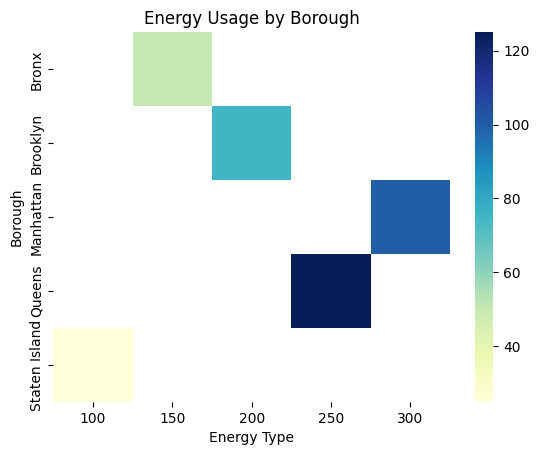

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into DataFrame
data = pd.DataFrame({'Borough': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
                     'Natural Gas': [150, 200, 300, 250, 100],
                     'Electricity': [100, 150, 200, 175, 75],
                     'Fuel Oil': [50, 75, 100, 125, 25]})
print(data.columns)
# Pivot data
pivoted_data = data.pivot(index='Borough', columns='Natural Gas', values='Fuel Oil')

# Create heatmap
sns.heatmap(pivoted_data, cmap='YlGnBu')

# Add title and labels
plt.title('Energy Usage by Borough')
plt.xlabel('Energy Type')
plt.ylabel('Borough')

# Show plot
plt.show()


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data into separate DataFrames
'''bronx_data = pd.read_csv('bronx_data.csv')
brooklyn_data = pd.read_csv('brooklyn_data.csv')
manhattan_data = pd.read_csv('manhattan_data.csv')
queens_data = pd.read_csv('queens_data.csv')'''

# Pivot each DataFrame to create new borough-specific DataFrames
bronx_pivoted = bronx.pivot(index='Development_Name' ,columns='Current_Charges', values='Consumption_Therms')
'''brooklyn_pivoted = brooklyn.pivot(index='Brooklyn', columns='Current Charges', values='Consumption (Therms)')
manhattan_pivoted = manhattan.pivot(index='Manhattan', columns='Current Charges', values='Consumption (Therms)')
queens_pivoted = queens.pivot(index='Queens', columns='Current Charges', values='Consumption (Therms)')


, brooklyn_pivoted, manhattan_pivoted, queens_pivoted
'''

# Concatenate all the borough-specific DataFrames together
sns.heatmap(bronx_pivoted, cmap='YlGnBu')

# Create heatmap using the concatenated DataFrame

# Add title and labels
plt.title('Energy Usage by Borough')
plt.xlabel('Current Charges')
plt.ylabel('Borough')

# Show plot
plt.show()


ValueError: Index contains duplicate entries, cannot reshape